# Garbage Classification with Convolutional Neural Network (CNN)

## Connecting Google Colab to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Solid Waste Detection with Convolutional Neural Networks (CNN)

1) Business Problem

2) Data Understanding

3) Data Preparation

4) Modelling

5) Evaluation

# 1) Business Problem

# 2) Data Understanding

## Dataset Story

The data set we will use in this project is TrashNet. It was prepared by Stanaford University students. The dataset consists of six different classes. There are a total of 2527 images in the dataset, including Glass, Paper, Cardboard, Plastic, Metal and Garbage.

Distribution of images:

- 501 glasses
- 594 paper
- 403 cardboard
- 482 plastic
- 410 metal
- 137 trash


The images were taken by placing them on a white board and using sunlight or room lighting. The images have a size of 512x384 pixels and 3 (RGB) channels.

## 2.1) Import Operations of Required Libraries

In [2]:
# Import the necessary libraries
import cv2
import urllib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import random, os, glob
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from urllib.request import urlopen
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# It is used to switch off warnings.
import warnings
warnings.filterwarnings('ignore')

# Libraries to be used for the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [3]:
!pip install imutils

## 2.2) Reading the Data Set



1. Pairing the Google Colab Notebook with the Google Drive account.
2. Upload the data set to Google Drive and show the address to the notebook
3. Defining the function to read the data set.

In [4]:
# Keeping the path information of the images in this data set in the drive
dir_path = '/content/drive/MyDrive/Garbage_classification'

In [5]:
# Determining Target size and Label Label Values

target_size = (224, 224)

waste_labels = {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [6]:
def load_datasets(path):

# Reads the image from the directory of images and creates the tags.

# Parameters

# path: The directory where the images are located.

# return:

# x: List holding the class information to which the images belong.

  x = []
  labels = []

  # It lists and sorts the images in the path we send.
  image_paths = sorted(list(paths.list_images(path)))

  for image_path in image_paths:
    # The images in the specified path are read with the openCV library.
    img = cv2.imread(image_path)

    # The read images are rescaled according to the initially specified target_size.
    img = cv2.resize(img, target_size)

    # Scaled images are added to the x list.
    x.append(img)

    # When each path is separated by '/', the second to last element of the returned list represents the label.
    label = image_path.split(os.path.sep)[-2]

    # A label is created by taking the value value corresponding to the key value sent from the waste_labels dictionary, which contains the numeric value equivalents of the captured labels.
    labels.append(waste_labels[label])

    # The data set is randomly shuffled.
    x, labels = shuffle(x, labels, random_state = 42)

  # Size and class information is reported.
  print(f"X size: {np.array(x).shape}")
  print(f"Label class number: {len(np.unique(labels))} Number of observations: {len(labels)}")

  return x, labels

In [7]:
x, labels = load_datasets(dir_path)

X size: (2527, 224, 224, 3)
Label class number: 6 Number of observations: 2527


In [8]:
# Retention of image sizes
input_shape = (np.array(x[0]).shape[1],np.array(x[0]).shape[1], 3)
print(input_shape)

(224, 224, 3)


## 2.3) Showing Examples from the Data Set

In [9]:
def visualize_img(image_batch, label_batch):

# The image is visualised from the data set.

# Parameters

# image_batch: Holds the martrix information of the images.

# label_batch: List holding the class information of the image.

  plt.figure(figsize=(10, 10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(np.array(list(waste_labels.keys()))[to_categorical(labels, num_classes=6)[n]==1][0].title())
    plt.axis('off')

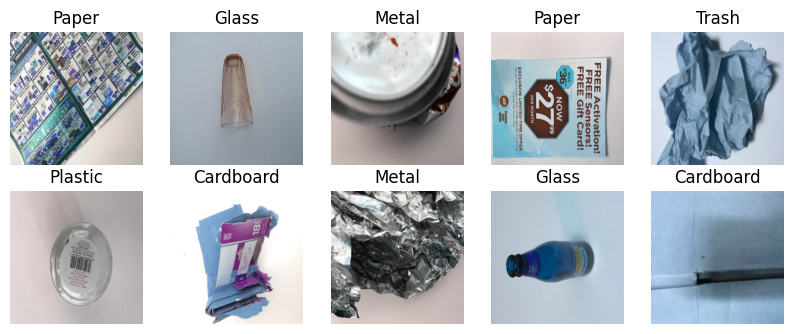

In [10]:
visualize_img(x, labels)

# 3 Data Preparation

In [11]:
# We define a generator for the Train dataset.
train = ImageDataGenerator(horizontal_flip=True,
                           vertical_flip=True,
                           validation_split=0.1,
                           rescale=1./255,
                           shear_range = 0.1,
                           zoom_range = 0.1,
                           width_shift_range= 0.1,
                           height_shift_range = 0.1)

# We define a generator for the test data set.
test = ImageDataGenerator(rescale=1/255,
                          validation_split=0.1)

In [12]:
train_generator=train.flow_from_directory(directory=dir_path,
                                          target_size=(target_size),
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(directory=dir_path,
                                        target_size=(target_size),
                                        batch_size=251,
                                        class_mode='categorical',
                                        subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


# 4) Modeling

## 4.1) Building a CNN Model from Scratch

- Sequential
- Convolution Layer (Convolotion Layer, Conv2D)
- Pooling Layer
- Activation Function Layer (Activation Layer)
- Flattening Layer
- Dense Layer
- Dropout Layer

In [13]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(input_shape), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=(input_shape), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(input_shape), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=6, activation='softmax'))

## 4.2) Model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)        0

## 4.3) Setting Optimisation and Evaluation Metrics

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "acc"])

In [16]:
callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode="min"),

             ModelCheckpoint(filepath='mymodel.h5', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=1)]

## 4.4) Training the Model

In [17]:
history = model.fit_generator(generator=train_generator,
                              epochs=25,
                              validation_data=test_generator,
                              callbacks=callbacks,
                              workers=4,
                              steps_per_epoch=2276//32,
                              validation_steps=251//32)

Epoch 1/25
71/71 [==============================] - ETA: 0s - loss: 1.6963 - precision: 0.5238 - recall: 0.0245 - acc: 0.2571
Epoch 1: val_loss improved from inf to 1.55716, saving model to mymodel.h5
71/71 [==============================] - 74s 804ms/step - loss: 1.6963 - precision: 0.5238 - recall: 0.0245 - acc: 0.2571 - val_loss: 1.5572 - val_precision: 0.5556 - val_recall: 0.0996 - val_acc: 0.3347
Epoch 2/25
71/71 [==============================] - ETA: 0s - loss: 1.5425 - precision: 0.6532 - recall: 0.0865 - acc: 0.3561
Epoch 2: val_loss improved from 1.55716 to 1.42398, saving model to mymodel.h5
71/71 [==============================] - 46s 634ms/step - loss: 1.5425 - precision: 0.6532 - recall: 0.0865 - acc: 0.3561 - val_loss: 1.4240 - val_precision: 0.8485 - val_recall: 0.1116 - val_acc: 0.4183
Epoch 3/25
71/71 [==============================] - ETA: 0s - loss: 1.4453 - precision: 0.6824 - recall: 0.1551 - acc: 0.4180
Epoch 3: val_loss improved from 1.42398 to 1.38125, saving m

## 4.5) Accuracy and Loss Graphs

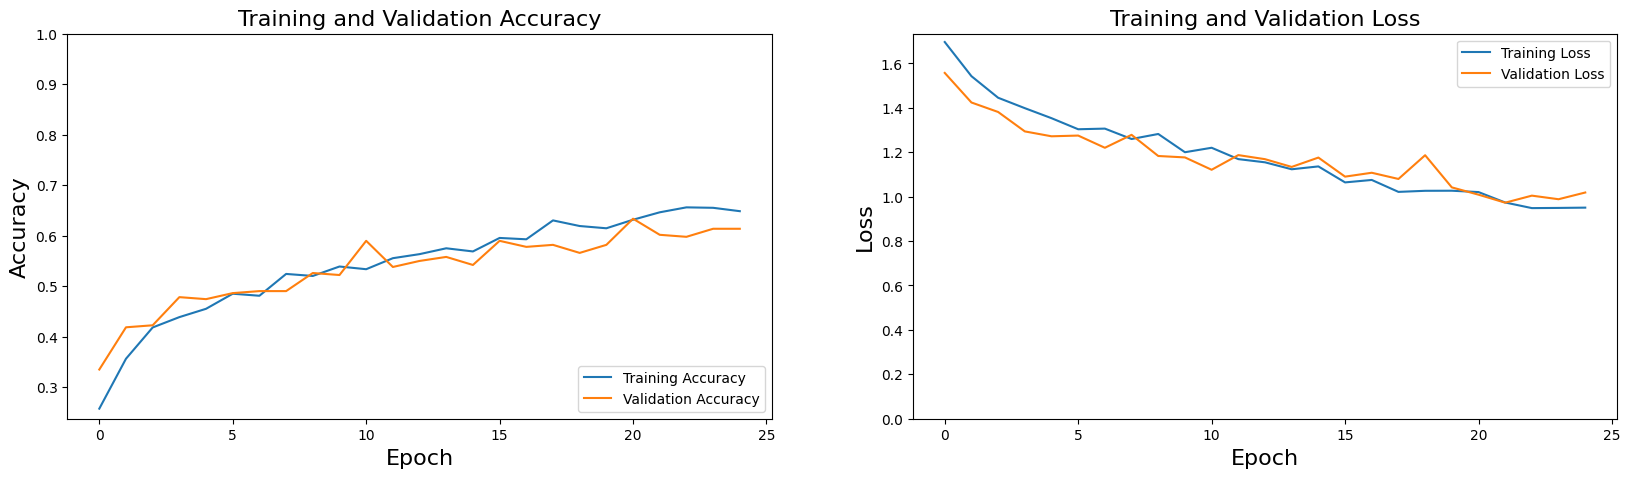

In [18]:
# Accuracy Graph
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label ='Training Accuracy')
plt.plot(history.history['val_acc'], label ='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)


# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()

# 5) Evaluation

In [19]:
loss, precision, recall, acc = model.evaluate(test_generator, batch_size=32)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))

1/1 [==============================] - 1s 1s/step - loss: 1.0186 - precision: 0.7692 - recall: 0.4781 - acc: 0.6135

Test Accuracy: 61.4%

Test Loss: 101.9%

Test Precision: 76.9%

Test Recall: 47.8%


In [20]:
# Classification Report
x_test, y_test = test_generator.next()
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
y_pred

8/8 [==============================] - 1s 52ms/step


array([1, 3, 1, 2, 3, 3, 1, 0, 3, 1, 5, 0, 1, 3, 2, 2, 1, 3, 2, 2, 1, 0,
       3, 1, 4, 1, 3, 0, 3, 2, 1, 2, 3, 1, 2, 3, 1, 1, 3, 2, 5, 2, 3, 1,
       1, 3, 2, 1, 1, 1, 3, 5, 4, 3, 2, 3, 2, 2, 1, 4, 3, 3, 0, 3, 3, 4,
       1, 1, 1, 5, 0, 1, 3, 4, 1, 2, 3, 1, 3, 3, 3, 1, 5, 2, 2, 1, 5, 3,
       1, 3, 1, 1, 0, 2, 3, 3, 4, 2, 3, 3, 2, 4, 1, 0, 3, 1, 2, 0, 1, 2,
       4, 3, 3, 2, 2, 4, 5, 0, 2, 3, 3, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 2,
       2, 1, 3, 1, 3, 1, 0, 3, 1, 4, 1, 3, 3, 1, 2, 5, 3, 3, 2, 0, 2, 1,
       3, 3, 4, 1, 2, 3, 5, 2, 0, 1, 1, 1, 3, 1, 1, 4, 3, 3, 3, 1, 0, 1,
       2, 4, 3, 5, 0, 3, 3, 0, 5, 3, 2, 1, 2, 3, 3, 5, 3, 3, 3, 0, 0, 1,
       3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 0, 1, 1, 2, 2, 1, 3, 3, 3, 1, 0,
       1, 2, 3, 3, 1, 3, 3, 2, 4, 4, 0, 2, 3, 3, 1, 2, 3, 3, 2, 3, 5, 1,
       1, 3, 4, 4, 3, 4, 1, 3, 1])

In [21]:
target_names = list(waste_labels.keys())

In [22]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   cardboard       0.91      0.50      0.65        40
       glass       0.51      0.72      0.60        50
       metal       0.60      0.68      0.64        41
       paper       0.67      0.92      0.77        59
     plastic       0.61      0.23      0.33        48
       trash       0.38      0.38      0.38        13

    accuracy                           0.61       251
   macro avg       0.61      0.57      0.56       251
weighted avg       0.64      0.61      0.59       251



In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True`.

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label', fontweight="bold")
  plt.xlabel('Predict Label', fontweight="bold")

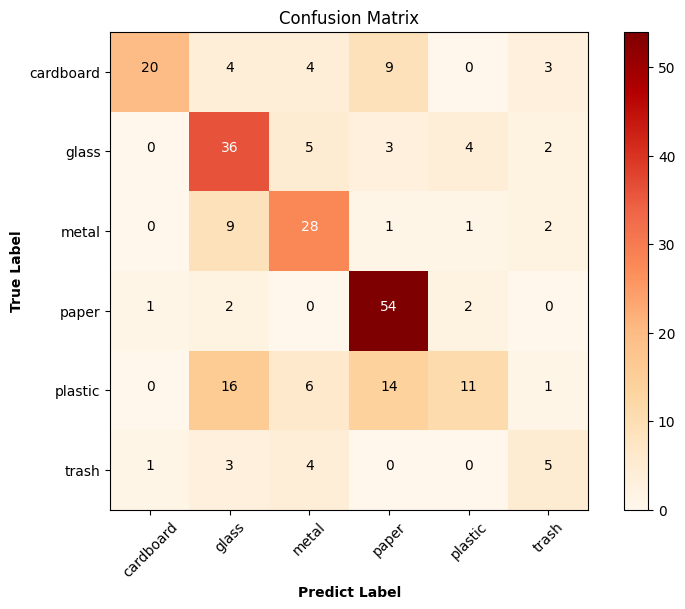

In [24]:
plot_confusion_matrix(cm, waste_labels.keys(),
                      title='Confusion Matrix',
                      cmap=plt.cm.OrRd)

# Using / Testing the Model

In [25]:
waste_labels = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [26]:
def model_testing(path):

# By reading the image in the directory where the images are located, the model is used to predict which class it belongs to.

# Parameters

# path: The directory where the images are located.

# Return:

# img: Image

# p: Prediction probabilities

# predicted_class: Predicted class

  img = image.load_img(path, target_size=(target_size))
  img = image.img_to_array(img, dtype=np.uint8)
  img=np.array(img)/255.0
  p=model.predict(img.reshape(1, 224, 224, 3))
  predicted_class = np.argmax(p[0])

  return img, p, predicted_class

1/1 [==============================] - 0s 25ms/step


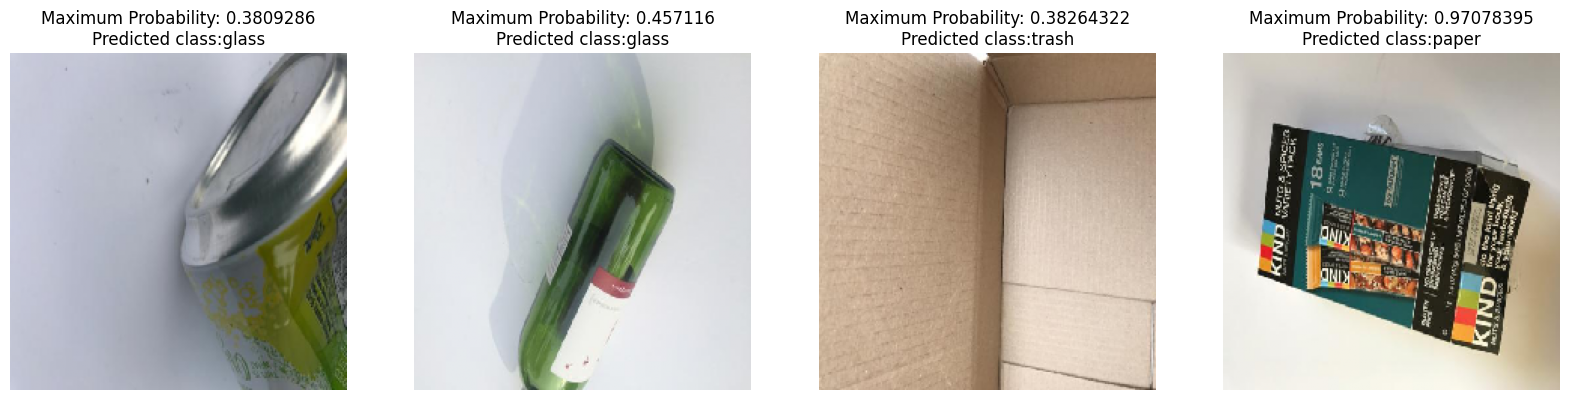

In [27]:
img1, p1, predicted_class1 = model_testing('/content/drive/MyDrive/Garbage_classification/metal/metal10.jpg')
img2, p2, predicted_class2 = model_testing('/content/drive/MyDrive/Garbage_classification/glass/glass105.jpg')
img3, p3, predicted_class3 = model_testing('/content/drive/MyDrive/Garbage_classification/cardboard/cardboard103.jpg')
img4, p4, predicted_class4 = model_testing('/content/drive/MyDrive/Garbage_classification/paper/paper106.jpg')

plt.figure(figsize=(20,60))

plt.subplot(141)
plt.axis('off')
plt.imshow(img1.squeeze())
plt.title("Maximum Probability: " + str(np.max(p1[0], axis = 0)) + "\n" + "Predicted class:" + str(waste_labels[predicted_class1]))
plt.imshow(img1);

plt.subplot(142)
plt.axis('off')
plt.imshow(img2.squeeze())
plt.title("Maximum Probability: " + str(np.max(p2[0], axis = 0)) + "\n" + "Predicted class:" + str(waste_labels[predicted_class2]))
plt.imshow(img2);

plt.subplot(143)
plt.axis('off')
plt.imshow(img3.squeeze())
plt.title("Maximum Probability: " + str(np.max(p3[0], axis = 0)) + "\n" + "Predicted class:" + str(waste_labels[predicted_class3]))
plt.imshow(img3);

plt.subplot(144)
plt.axis('off')
plt.imshow(img4.squeeze())
plt.title("Maximum Probability: " + str(np.max(p4[0], axis = 0)) + "\n" + "Predicted class:" + str(waste_labels[predicted_class4]))
plt.imshow(img4);